In [246]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [247]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [248]:
cities[0]

'mataura'

## Perform API Calls

In [249]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

response = requests.get(url+"&q="+cities[0]).json()

print(response)
url

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.27, 'pressure': 1012.7, 'humidity': 88, 'temp_min': 55.27, 'temp_max': 55.27, 'sea_level': 1027.74, 'grnd_level': 1012.7}, 'wind': {'speed': 10.22, 'deg': 258.002}, 'clouds': {'all': 92}, 'dt': 1547409183, 'sys': {'message': 0.0197, 'country': 'NZ', 'sunrise': 1547313038, 'sunset': 1547368518}, 'id': 6201424, 'name': 'Mataura', 'cod': 200}


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=701be8995f7ac3325a8d540a535ba4d1'

In [250]:
response
#print(json.dumps(response, indent=6, sort_keys=True))

{'coord': {'lon': 168.86, 'lat': -46.19},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.27,
  'pressure': 1012.7,
  'humidity': 88,
  'temp_min': 55.27,
  'temp_max': 55.27,
  'sea_level': 1027.74,
  'grnd_level': 1012.7},
 'wind': {'speed': 10.22, 'deg': 258.002},
 'clouds': {'all': 92},
 'dt': 1547409183,
 'sys': {'message': 0.0197,
  'country': 'NZ',
  'sunrise': 1547313038,
  'sunset': 1547368518},
 'id': 6201424,
 'name': 'Mataura',
 'cod': 200}

In [251]:
city_name=[]
country=[]
lat=[]
lon=[]
humidity=[]
temp_max=[]
wind_speed=[]
clouds=[]

count1=0
count=0

for city in cities:
    try:
        response = requests.get(url+"&q="+city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        count=count +1
        print(f"Processing Record for  {city} {count}")

    except:
        count1=count1+1
        print(f"                                                 fabulous {city}   not found    {count1}")
        pass
    
    
    

Processing Record for  mataura 1
Processing Record for  howell 2
Processing Record for  vaini 3
Processing Record for  albany 4
Processing Record for  ushuaia 5
Processing Record for  chokurdakh 6
Processing Record for  juneau 7
Processing Record for  kodiak 8
Processing Record for  iquique 9
Processing Record for  moscow 10
Processing Record for  kloulklubed 11
Processing Record for  ostrovnoy 12
Processing Record for  hobart 13
Processing Record for  guerrero negro 14
Processing Record for  kasongo-lunda 15
Processing Record for  norman wells 16
Processing Record for  najran 17
Processing Record for  dikson 18
Processing Record for  alofi 19
Processing Record for  westport 20
Processing Record for  hithadhoo 21
Processing Record for  yemanzhelinsk 22
Processing Record for  jamestown 23
Processing Record for  mungaa 24
Processing Record for  punta arenas 25
Processing Record for  bredasdorp 26
                                                 fabulous illoqqortoormiut   not found    1


Processing Record for  shubarkuduk 164
Processing Record for  nosy varika 165
Processing Record for  anadyr 166
Processing Record for  peniche 167
Processing Record for  leiyang 168
Processing Record for  aguimes 169
                                                 fabulous lolua   not found    28
Processing Record for  tuktoyaktuk 170
Processing Record for  andros town 171
Processing Record for  nanortalik 172
Processing Record for  morondava 173
Processing Record for  mayo 174
Processing Record for  brae 175
Processing Record for  parana 176
Processing Record for  pirovskoye 177
Processing Record for  eravur 178
Processing Record for  deputatskiy 179
Processing Record for  honningsvag 180
Processing Record for  lorengau 181
Processing Record for  fukue 182
Processing Record for  barrow 183
Processing Record for  ushumun 184
Processing Record for  le port 185
Processing Record for  houma 186
Processing Record for  vikhorevka 187
Processing Record for  smithers 188
Processing Record fo

Processing Record for  isangel 350
Processing Record for  gatesville 351
                                                 fabulous phan rang   not found    45
Processing Record for  razole 352
Processing Record for  primero de enero 353
Processing Record for  lishui 354
Processing Record for  kupino 355
Processing Record for  kangaatsiaq 356
Processing Record for  ihosy 357
                                                 fabulous olafsvik   not found    46
Processing Record for  coxim 358
Processing Record for  ashington 359
Processing Record for  emerald 360
Processing Record for  sterling 361
Processing Record for  turochak 362
Processing Record for  scarborough 363
Processing Record for  caravelas 364
Processing Record for  celestun 365
Processing Record for  seara 366
Processing Record for  sur 367
Processing Record for  salinas 368
Processing Record for  say 369
Processing Record for  omboue 370
Processing Record for  hongjiang 371
Processing Record for  shitanjing 372
Processing

Processing Record for  san cristobal 528
Processing Record for  kaeo 529
Processing Record for  ust-tsilma 530
Processing Record for  flagstaff 531
Processing Record for  am timan 532
Processing Record for  college 533
                                                 fabulous banmo   not found    67
Processing Record for  aljezur 534
                                                 fabulous richard toll   not found    68
                                                 fabulous bolshegrivskoye   not found    69
Processing Record for  bell ville 535
Processing Record for  zhezkazgan 536


In [242]:
wheather_df=pd.DataFrame({"city": city_name,
                 "country": country,
                 "lat": lat,
                 "lon": lon,
                 "humidity": humidity,
                 "temp_max": temp_max,
                 "wind_speed": wind_speed,
                 "clouds": clouds})
wheather_df.head()

wheather_df[wheather_df["humidity"]== 290]

,city,country,lat,lon,humidity,temp_max,wind_speed,clouds


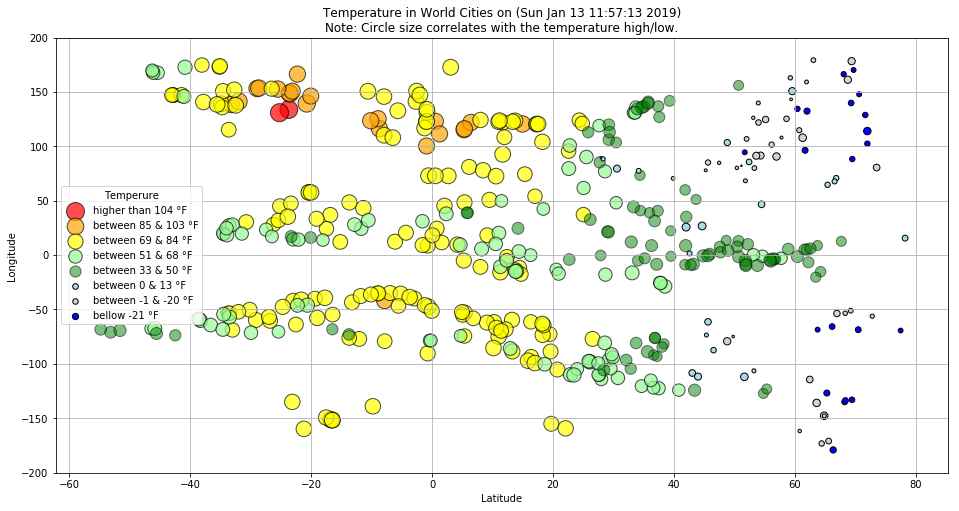

In [252]:
# Scatter Plot Temperature (F) vs. Latitude
plt.figure(figsize=(16,8))

above104F=wheather_df[(wheather_df.temp_max >= 104)]
plt.scatter(x=above104F["lat"], y=above104F["lon"],s=above104F["temp_max"]*3, marker="o", color='red', edgecolor='black', label='higher than 104 °F', alpha='0.7')

from85_to_103=wheather_df[(wheather_df.temp_max >=85) & (wheather_df.temp_max <=103)]
plt.scatter(x=from85_to_103["lat"], y=from85_to_103["lon"], s=from85_to_103["temp_max"]*3, marker="o", color='orange', edgecolor='black',label='between 85 & 103 °F', alpha='0.7')

from69_to_84=wheather_df[(wheather_df.temp_max >=69) & (wheather_df.temp_max <=84)]
plt.scatter(x=from69_to_84["lat"], y=from69_to_84["lon"], s=from69_to_84["temp_max"]*3, marker="o", color='yellow', edgecolor='black',label='between 69 & 84 °F', alpha='0.7')

from51_to_68=wheather_df[(wheather_df.temp_max >=51) & (wheather_df.temp_max <=68)]
plt.scatter(x=from51_to_68["lat"], y=from51_to_68["lon"], s=from51_to_68["temp_max"]*3, marker="o", color='palegreen', edgecolor='black',label='between 51 & 68 °F', alpha='0.7')

from33_to_50=wheather_df[(wheather_df.temp_max >=33) & (wheather_df.temp_max <=50)]
plt.scatter(x=from33_to_50["lat"], y=from33_to_50["lon"], s=from33_to_50["temp_max"]*3, marker="o", color='green', edgecolor='black',label='between 33 & 50 °F',alpha='0.5')

cero_to_32=wheather_df[(wheather_df.temp_max >=(0)) & (wheather_df.temp_max <=13)]
plt.scatter(x=cero_to_32["lat"], y=cero_to_32["lon"], s=cero_to_32["temp_max"]*5, marker="o", color='lightblue', edgecolor='black',label='between 0 & 13 °F')

minus1_to_minus20=wheather_df[(wheather_df.temp_max <= (-1)) & (wheather_df.temp_max >= (-20))]
plt.scatter(x=minus1_to_minus20["lat"], y=minus1_to_minus20["lon"], s=minus1_to_minus20["temp_max"]*(-3), marker="o", color='lightgray', edgecolor='black',label='between -1 & -20 °F')

bellow21=wheather_df[(wheather_df.temp_max <= (-21))]
plt.scatter(x=bellow21["lat"], y=bellow21["lon"], s=bellow21["temp_max"]*(-1), marker="o", color='blue', edgecolor='black',label='bellow -21 °F')

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities on ({time.asctime(time.localtime(time.time()))})" + "\nNote: Circle size correlates with the temperature high/low.")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
plt.legend(loc="best", title="Temperure")

#plt.text(-20, 220,"Note: Circle size correlates with driver count per city.", fontsize = 12)
plt.savefig("Plots/fig1.png")

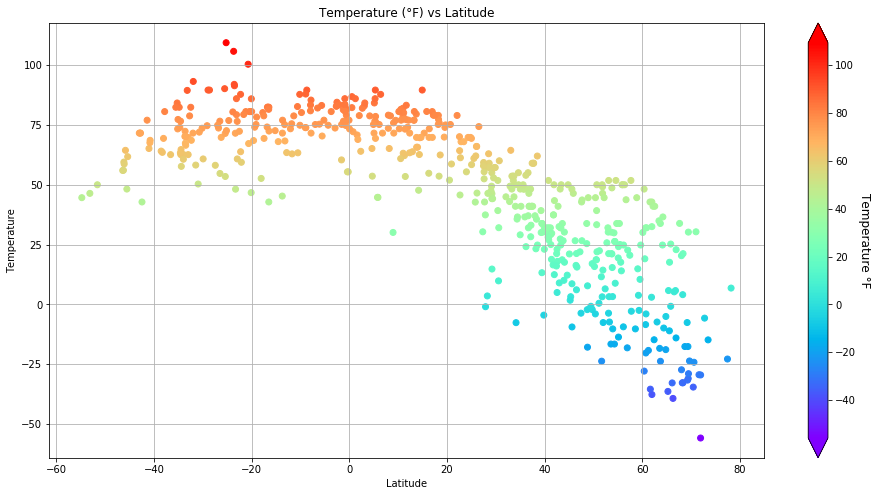

In [253]:
fig, ax = plt.subplots(figsize=(16,8))


x = wheather_df["lat"]
y = wheather_df["temp_max"]
colors = wheather_df["temp_max"]

plot = plt.scatter(x, y, c=colors, cmap='rainbow')
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
cbar = plt.colorbar(plot, extend='both')   #display color bar

cbar.ax.get_yaxis().labelpad = 15   #distance of label from color bar
cbar.ax.set_ylabel('Temperature °F', rotation=270, fontsize = 12)
plt.savefig("Plots/fig2.png")

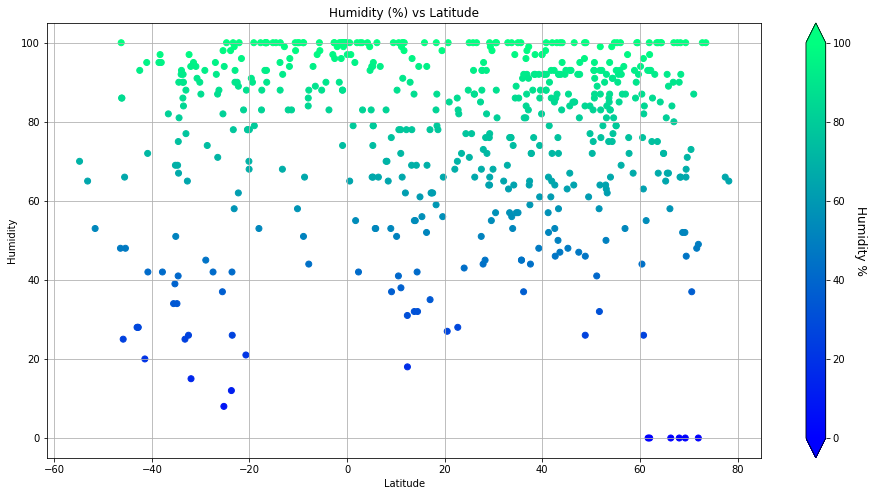

In [255]:
#Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize=(16,8))
wheather_df1 =wheather_df[wheather_df["humidity"]<= 100]

x = wheather_df1["lat"]
y = wheather_df1["humidity"]
colors = wheather_df1["humidity"]

plot = plt.scatter(x, y, c=colors, cmap='winter')
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
cbar = plt.colorbar(plot,extend='both')   #display color bar

cbar.ax.get_yaxis().labelpad = 15   #distance of label from color bar
cbar.ax.set_ylabel('Humidity %', rotation=270, fontsize = 12)

plt.savefig("Plots/fig3.png")


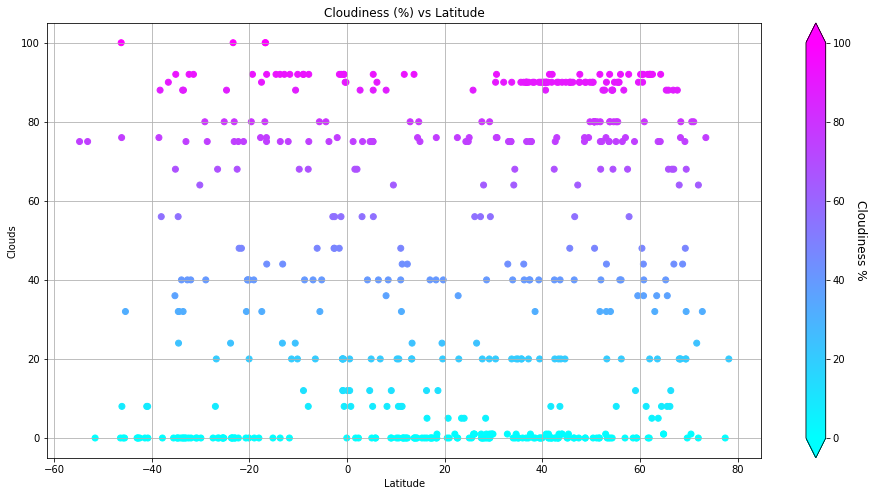

In [256]:
fig, ax = plt.subplots(figsize=(16,8))

x = wheather_df["lat"]
y = wheather_df["clouds"]
colors = wheather_df["clouds"]

plot = plt.scatter(x, y, c=colors, cmap='cool')
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid()
cbar = plt.colorbar(plot, extend='both')   #display color bar

cbar.ax.get_yaxis().labelpad = 15   #distance of label from color bar
cbar.ax.set_ylabel('Cloudiness %', rotation=270, fontsize = 12)
plt.savefig("Plots/fig4.png")

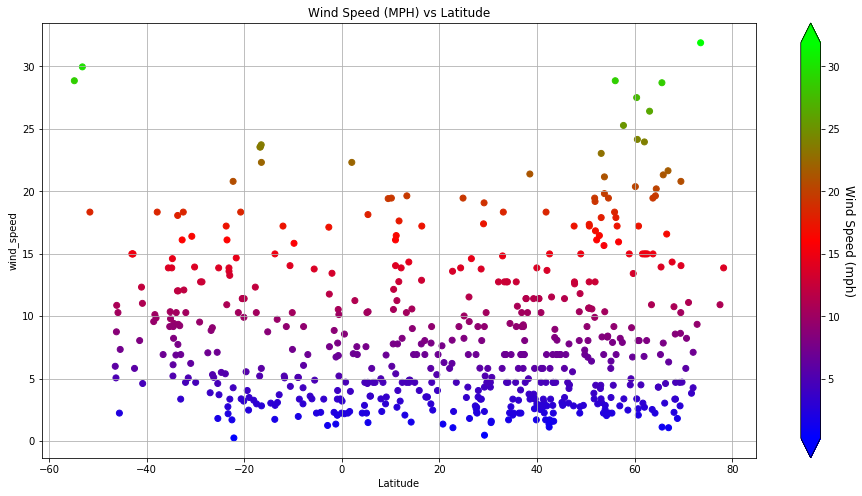

In [257]:
fig, ax = plt.subplots(figsize=(16,8))

x = wheather_df["lat"]
y = wheather_df["wind_speed"]
colors = wheather_df["wind_speed"]

plot = plt.scatter(x, y, c=colors,  cmap='brg')
plt.title("Wind Speed (MPH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("wind_speed")
plt.grid()
cbar = plt.colorbar(plot,extend='both')   #display color bar

cbar.ax.get_yaxis().labelpad = 15   #distance of label from color bar
cbar.ax.set_ylabel('Wind Speed (mph)', rotation=270, fontsize = 12)
plt.savefig("Plots/fig5.png")